In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# Load the dataset
data = pd.read_csv('used_cars.csv')
data.head(3)


,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46


In [2]:
# Select the columns for clustering and anomaly detection
columns = ['price', 'yearOfRegistration', 'powerPS', 'kilometer']

# Remove rows with missing values
data = data[columns].dropna()

# Normalize the data
data_norm = (data - data.mean()) / data.std()

In [3]:
# Set the number of clusters
n_clusters = 2

# Initialize the K-means model
kmeans = KMeans(n_clusters=n_clusters, random_state=0)

# Fit the K-means model to the normalized data
kmeans.fit(data_norm)


KMeans(n_clusters=2, random_state=0)

In [4]:
# Initialize the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.1, random_state=0)

# Fit the Isolation Forest model to the normalized data
isolation_forest.fit(data_norm)


C:\Users\io\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=0)

In [5]:
# Predict the clusters
clusters = kmeans.predict(data_norm)

# Predict the anomalies
anomalies = isolation_forest.predict(data_norm)

# Convert the anomaly predictions to binary (1: normal, -1: anomaly)
anomalies = np.where(anomalies == 1, 0, 1)

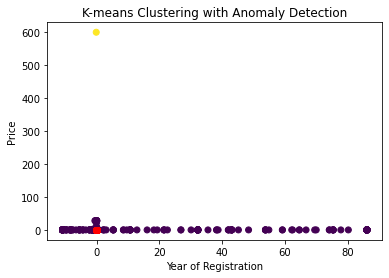

In [8]:
# Scatter plot of clusters with color-coded anomalies
plt.scatter(data_norm['yearOfRegistration'], data_norm['price'], c=clusters, cmap='viridis')
plt.scatter(data_norm['yearOfRegistration'][anomalies], data_norm['price'][anomalies], color='red')
plt.xlabel('Year of Registration')
plt.ylabel('Price')
plt.title('K-means Clustering with Anomaly Detection')
plt.show()